# 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

# 2. Taking a quick look at the data

In [3]:
#Check the data for consistency and missing values
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# setting the index to the rank
df.set_index('Happiness Rank', inplace = True)

In [5]:
df.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,,
1,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
#Checking the data types of the respective columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), object(2)
memory usage: 14.8+ KB


<font color ='red'>
From the above, the only two non-numerical columns are that of the Country and Region. The column 'Country' wouldnt be a relevant feature however the column 'Region' could be relevant and hence would be encoded later
</font>

In [7]:
# Finding how many categories are there in the column Region
print(len(df['Region'].value_counts()))

# finding the categories and their frequency in the column region
df['Region'].value_counts()

10


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

## 2.1 Checking the data distribution for the numerical values of the column

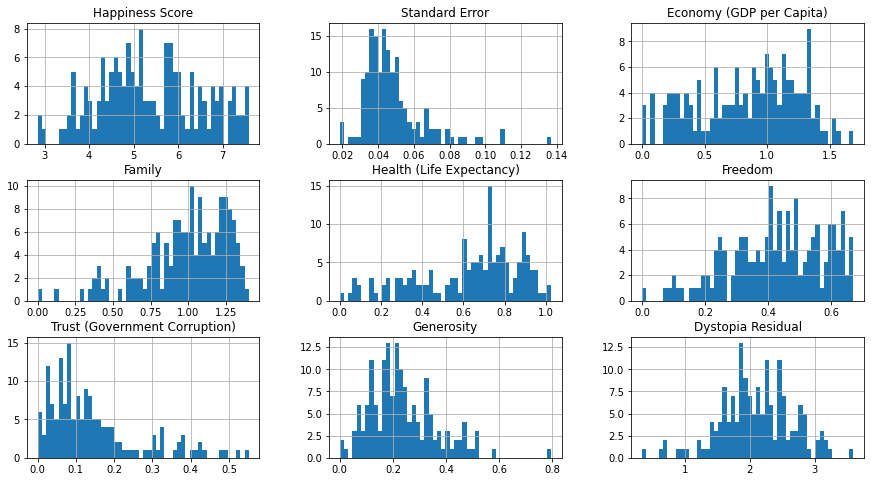

In [8]:
df.hist(bins = 50, figsize = (15, 8))
plt.show()

<font color='red'>
    The histogram for the numerical data shows a fairly normal distribution, only the data on Trust (Government Corruption) and Family seem to shifted slighty from a normal distribution.
    <br><br>
    The values of all the features are not scaled and capped to have only positive values. 
</font>

In [9]:
## 2.2 Looking for correlations in the dataset
corr_matrix = df.corr()
corr_matrix['Happiness Score'].sort_values(ascending = False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Name: Happiness Score, dtype: float64

<font color='red'>
    As evident from the above, the countries economy, family, health, freedom and Dystopian residual correlate strongly with the happiness score. 
    <br><br>
    However it is surprising that the Trust (Government Corruption) doesn't seem to affect the satisfaction/ happiness of the people. 
    <br><br>
    Also the Generosity doesn't seem to contribute much to the happiness score of a country
    
</font>

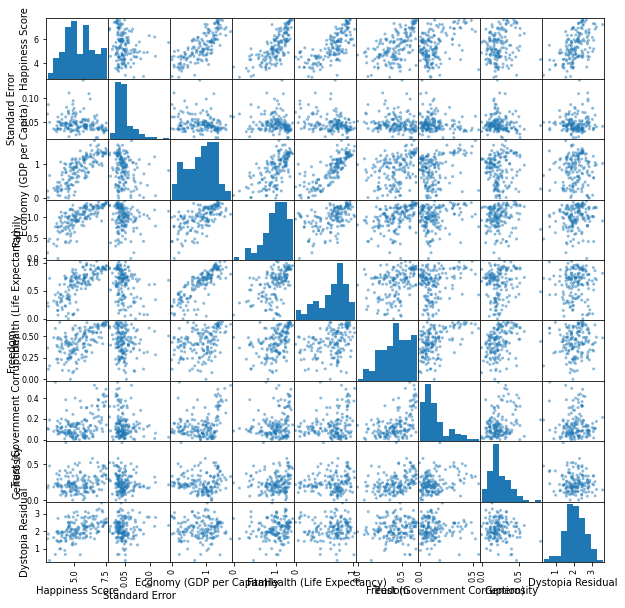

In [10]:
# 2.3 Visualizing the correlations between the numerical attributes of the dataset
numerical_columns = [_ for _ in df.columns if df[_].dtype != 'object']

pd.plotting.scatter_matrix(df[numerical_columns], figsize = (10, 10))
plt.show()

# 3. Splitting the data into a training and test dataset

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# firstly we create a new dataset without the country names 
df = df.drop('Country', axis = 1)

In [13]:
df.head()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,,,,,,,,,,
1,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
2,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
3,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
4,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [14]:
# use train_test_split to create a training and test dataset
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 42)

# 4. Handling text and categorical attributes

In [21]:
from sklearn.preprocessing import OrdinalEncoder

In [23]:
oe = OrdinalEncoder()
cat_encoded_train = oe.fit_transform(train_data[['Region']])
cat_encoded_test  = oe.fit_transform(test_data[['Region']])

In [26]:
#dropping the categorical values and adding the encoded values in the training set
encoded_train_data = train_data.drop(['Region','Happiness Score'], axis = 1)
encoded_train_data['encoded region'] = cat_encoded_train

In [29]:
# Dropping the categorical values and adding the encoded values in the test set
encoded_test_data = test_data.drop(['Region','Happiness Score'], axis = 1)
encoded_test_data['encoded region'] = cat_encoded_test

In [33]:
# Creating the target values
train_target = train_data['Happiness Score'].copy()
test_target  = test_data['Happiness Score'].copy()

In [35]:
# Running a simple linear Regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(encoded_train_data, train_target)

LinearRegression()

In [37]:
y_pred = lin_reg.predict(encoded_test_data)

In [39]:
from sklearn.metrics import mean_squared_error


In [40]:
lin_mse = mean_squared_error(test_target, y_pred)

In [41]:
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.00027751819567835176


In [59]:
print('Predicted Value : ',y_pred[0])
print('True Value      : ',test_target.values[0])

Predicted Value :  4.306993342879104
True Value      :  4.307


# 5. Saving the model 

In [55]:
import joblib

In [56]:
joblib.dump(lin_reg, 'mymodel.pkl')

['mymodel.pkl']